In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [2]:
toy_alloy_data = pd.read_csv("toy_alloy_data.csv")
X_name = [f'element {i}' for i in range(1,13)]
Y_name = [f'property {i}' for i in range(1,7)]
X = toy_alloy_data[X_name].values
Y = toy_alloy_data[Y_name].values

# 数据探索

### 是否存在偏离的异常值

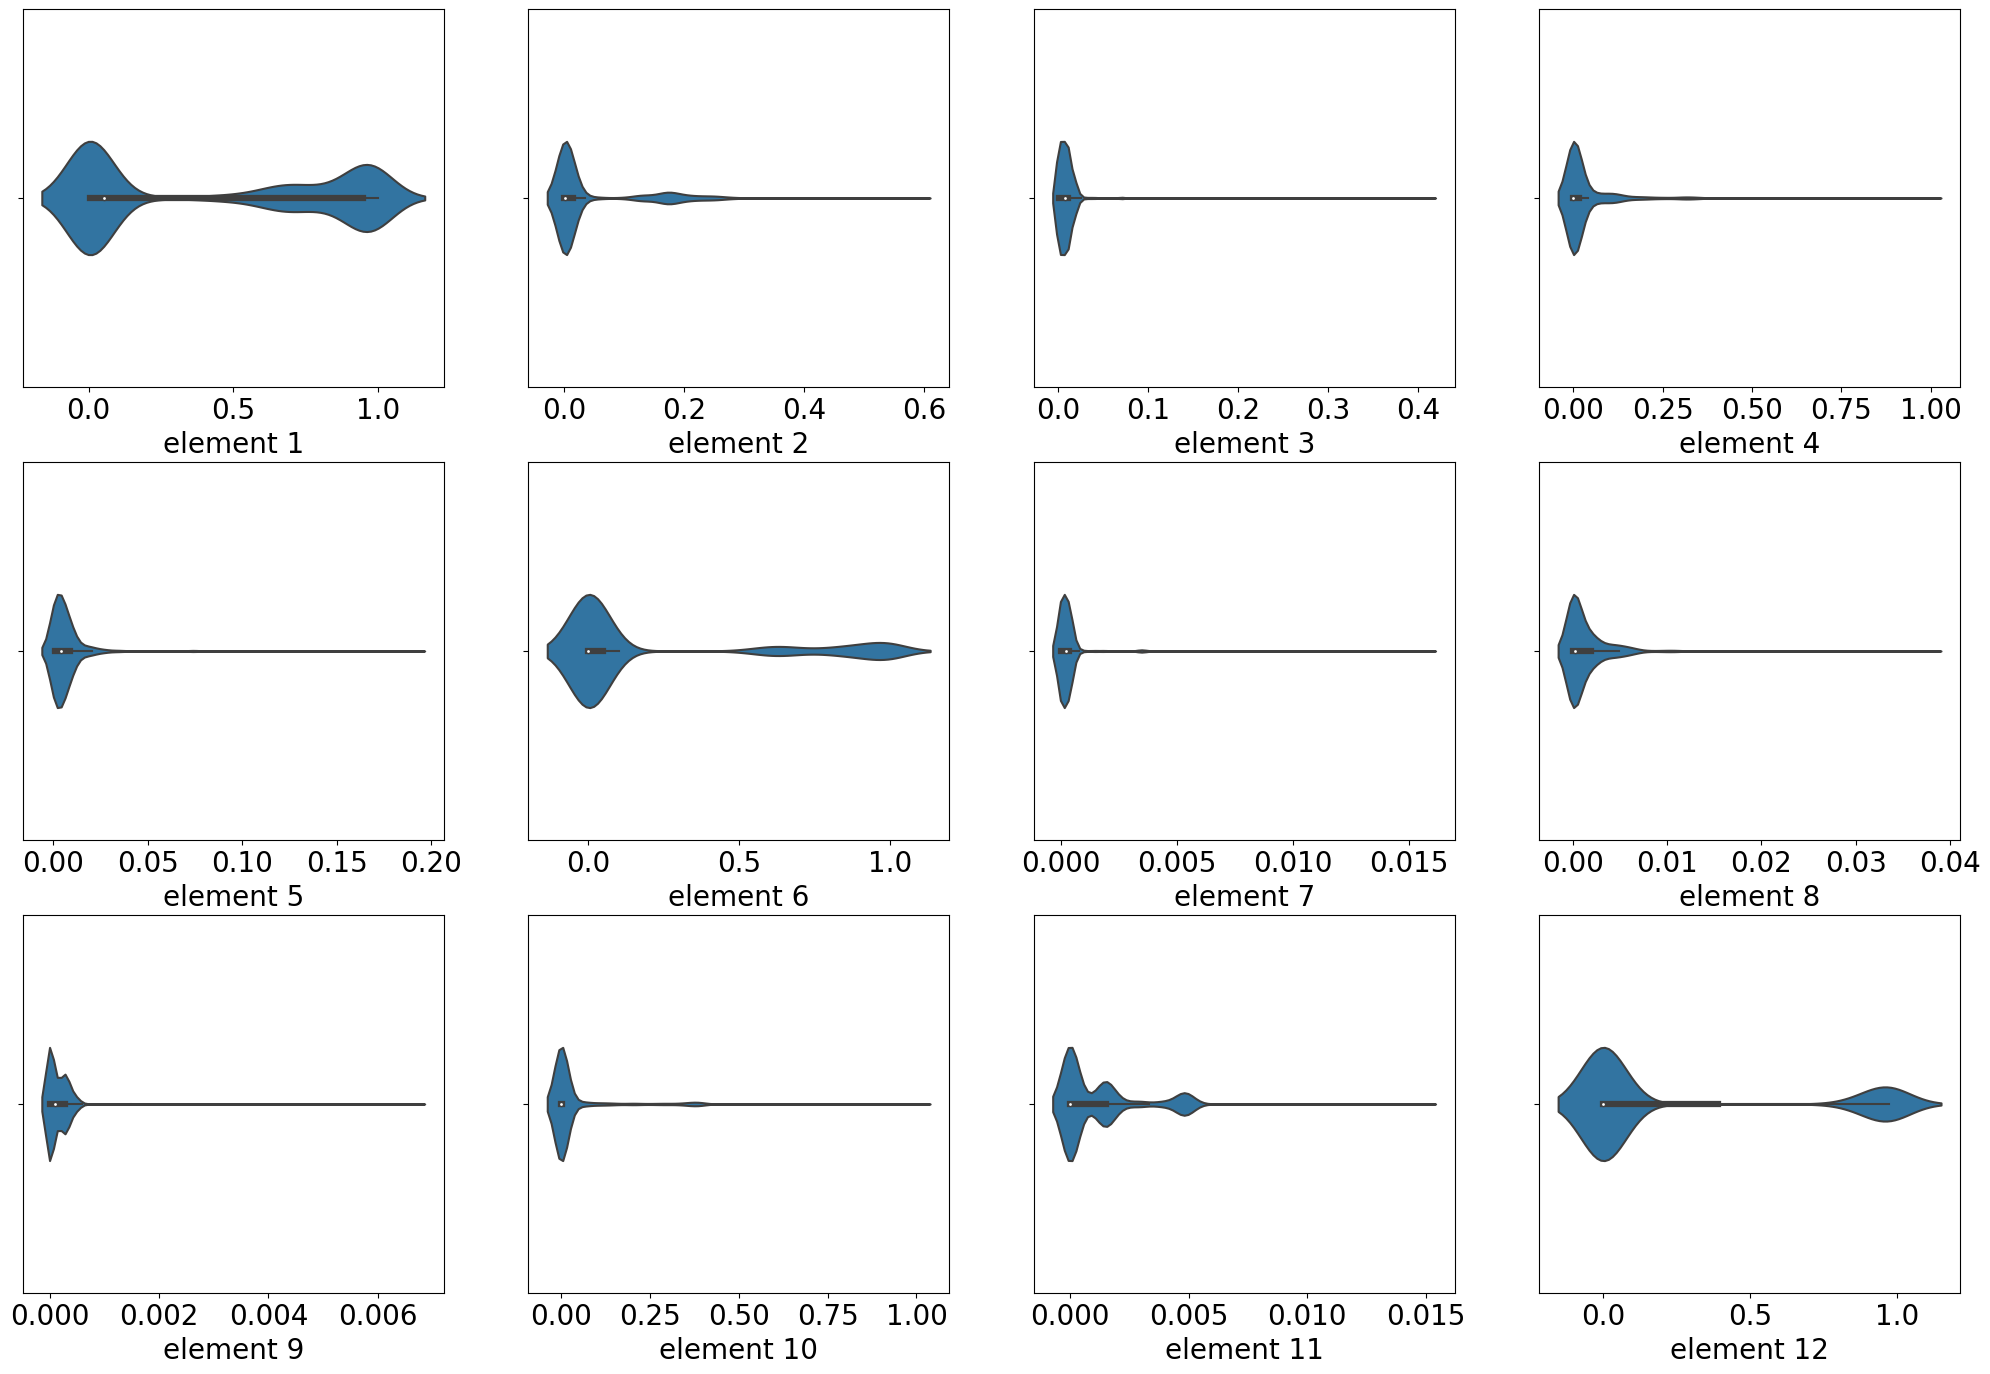

In [3]:

X = toy_alloy_data[X_name]
column = X.columns.tolist()[:12]
fig = plt.figure(figsize = (25, 17), dpi = 100)
for i in range(12):
    plt.subplot(3, 4, i+1)
    sns.violinplot(X[column[i]], width=0.3)
    plt.xlabel(column[i])

plt.show()

### 数据分布直方图与QQ图

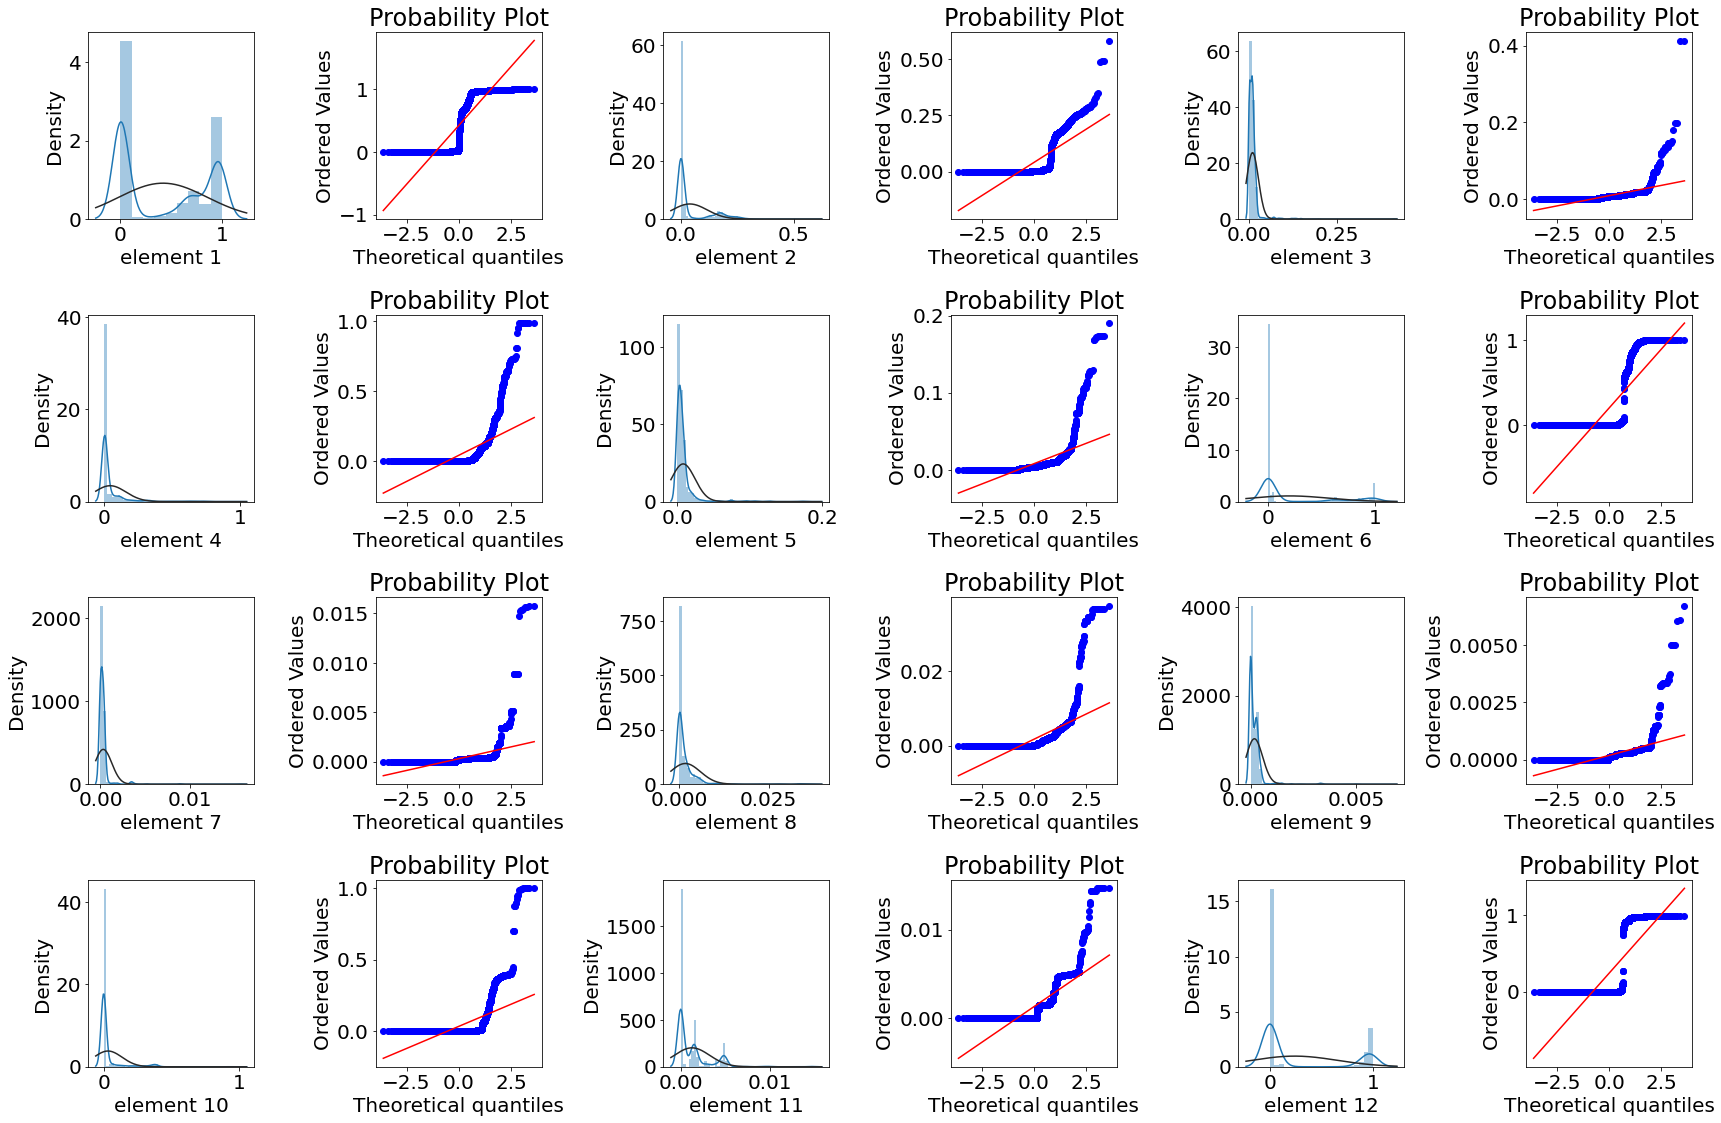

In [4]:
train_cols = 6
train_rows = len(X.columns) // 3
plt.figure(figsize=(4*train_cols, 4*train_rows))

i = 0
for col in X.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(X[col], fit = stats.norm)
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(X[col],plot = plt)
plt.tight_layout()
plt.show()

### 特征的相关性

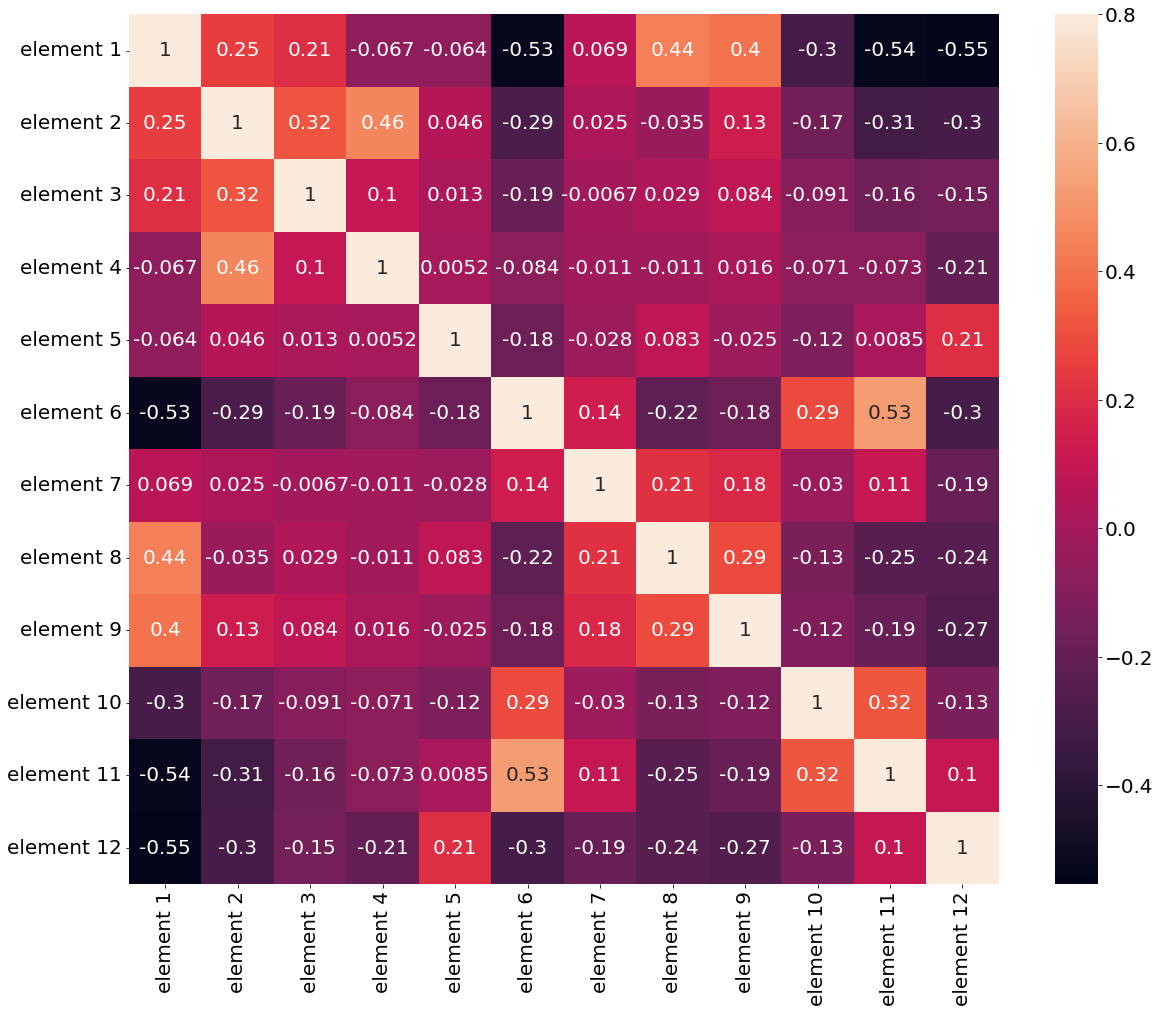

In [5]:
train_corr = X.corr()
ax = plt.subplots(figsize = (20, 16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)